In [3]:
#### Paweł Gorgolewski

In [4]:
from numpy import float32, float64, linspace, arange, full
import matplotlib.pyplot as plt
import time

In [5]:
v = 0.53125
N = 10 ** 7
numbers = [float32(v) for _ in range(N)]
precise_sum = N*v

In [6]:
def iterative_sum(numbers):
    result = float32(0.0)
    for num in numbers:
        result += num

    return result

iterative = iterative_sum(numbers)

print(f"Iterative sum is {iterative}")
print(f"Precise sum is {precise_sum}")

Iterative sum is 5030840.5
Precise sum is 5312500.0


### PUNKT 2 SPRAWDZANIE ERRORS

In [7]:
def absolute_error(counted, precise):
    return abs(precise - counted)

def relative_error(counted, precise):
    return absolute_error(counted, precise) / precise

In [8]:
print(f"Absolute error of iterative sum: {absolute_error(iterative, precise_sum)}")
print(f"Relative error of iterative sum: {relative_error(iterative, precise_sum)}")

Absolute error of iterative sum: 281659.5
Relative error of iterative sum: 0.05301825882352941


#### TODO KOMENTARZ DO TEGO

##### PKT 3 -> wykres

In [9]:
def relative_error_over_time_plot(numbers, step=25000):
    relative_error_in_steps = [float32(0.0)]
    result = float32(0.0)
    for i in range(len(numbers)):
        result += numbers[i]
        if (i + 1) % step == 0:
            tmp_error = relative_error(result, v*(i+1))
            relative_error_in_steps.append(tmp_error)

    steps = [x * step for x in range(0, N // step + 1)]
    plt.plot(steps, relative_error_in_steps)
    plt.xlabel('STEPS')
    plt.ylabel('ERROR')
    plt.title("Relative error over iterations")
    plt.show()

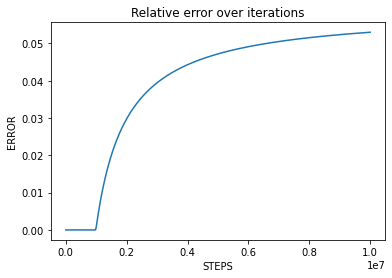

In [10]:
relative_error_over_time_plot(numbers)

### KOMENATRZ DO WYKRESU

### PKT 4 recoursive sum

In [11]:
def recursive_sum(numbers):
    if len(numbers) > 2:
        return recursive_sum(numbers[:len(numbers) // 2]) + recursive_sum(numbers[len(numbers) // 2:])
    else:
        return numbers[0] if len(numbers) == 1 else numbers[0] + numbers[1]

recursive = recursive_sum(numbers)

print(f"Recursive sum is {recursive}")
print(f"Precise sum is {precise_sum}")

Recursive sum is 5312500.0
Precise sum is 5312500.0


#### PKT 5 -> wzgl i bezwgl blad recursive

In [12]:
print(f"Absolute error of recursive sum: {absolute_error(recursive, precise_sum)}")
print(f"Relative error of recursive sum: {relative_error(recursive, precise_sum)}")

Absolute error of recursive sum: 0.0
Relative error of recursive sum: 0.0


### komentarz do tego

### pkt 6 -> sprw czas dla recursive i iterative

In [13]:
iterative_start = time.time()
iterative_sum(numbers)
iterative_time = time.time() - iterative_start

recursive_start = time.time()
recursive_sum(numbers)
recursive_time = time.time() - recursive_start

print(f"Iterative sum takes {iterative_time} seconds")
print(f"Recursive sum takes {recursive_time} seconds")

Iterative sum takes 1.4217748641967773 seconds
Recursive sum takes 7.557807445526123 seconds


### PKT 7

In [14]:
difficult_example = [float32(0.81111) for _ in range(N)]
recursive = recursive_sum(difficult_example)
precise_sum = 0.81111*N

print(f"Recursive sum is {recursive}")
print(f"Precise sum is {precise_sum}")
print(f"Absolute error is: {absolute_error(recursive, precise_sum)}")
print(f"Relative error is: {relative_error(recursive, precise_sum)}")

Recursive sum is 8111101.0
Precise sum is 8111100.0
Absolute error is: 1.0
Relative error is: 1.2328784012032893e-07


#### JAKIS KOMENTARZ

# ZAD 2 pkt A

In [15]:
def kahan_sum(numbers):
    result = float32(0)
    err = float32(0)
    for num in numbers:
        y = num - err
        temp = result + y
        err = (temp - result) - y
        result = temp

    result = result - err
    return result

In [16]:
kahan = kahan_sum(difficult_example)

print(f"Kahan sum is {kahan}")
print(f"Precise sum is {precise_sum}")
print(f"Absolute error is: {absolute_error(kahan, precise_sum)}")
print(f"Relative error is: {relative_error(kahan, precise_sum)}")

Kahan sum is 8111100.0
Precise sum is 8111100.0
Absolute error is: 0.0
Relative error is: 0.0


## KOMENATRZ

## PKT 2 ODP

## PKT 3

In [17]:
recursive_start = time.time()
recursive_sum(difficult_example)
recursive_time = time.time() - recursive_start

kahan_start = time.time()
kahan_sum(difficult_example)
kahan_time = time.time() - kahan_start

print(f"Recursive sum takes {recursive_time} seconds")
print(f"Kahan sum takes {kahan_time} seconds")

Recursive sum takes 7.853030443191528 seconds
Kahan sum takes 7.227712392807007 seconds


## JAKIS KOMENTARZ

# ZAD 3

In [18]:
def dzeta_forward(n, s, float_type=float32):
    """Dzeta forward"""
    result = float_type(0.0)
    for k in range(1, n+1):
        result += float_type(1 / float_type(k**s))
    return result


def dzeta_backward(n, s, float_type=float32):
    """Dzeta backward"""
    result = float_type(0.0)
    for k in range(n, 0, -1):
        result += float_type(1 / float_type(k**s))
    return result


def eta_forward(n, s, float_type=float32):
    """Eta forward"""
    result = float_type(0.0)
    for k in range(1, n+1):
        result += float_type(float_type((-1) ** float_type(k - 1)) / float_type(k**s))
    return result


def eta_backward(n, s, float_type=float32):
    """Eta backward"""
    result = float_type(0.0)
    for k in range(n, 0, -1):
        result += float_type(float_type((-1) ** float_type(k - 1)) / float_type(k**s))

    return result

In [19]:
def check_funcs_for_different_values(forward_func, backward_func):
    N = [50, 100, 200, 500, 1000]
    S = [2, 3.6667, 5, 7.2, 10]

    for i in range(len(N)):
        n = N[i]
        s = S[i]

        float32_result_forward = forward_func(n,s)
        float64_result_forward = forward_func(n,s, float64)

        float32_result_backward = backward_func(n,s)
        float64_result_backward = backward_func(n,s, float64)

        float_diff_forward = abs(float32_result_forward-float64_result_forward)
        float_diff_backward = abs(float32_result_backward-float64_result_backward)

        front_back_32_diff = abs(float32_result_backward-float32_result_forward)
        front_back_64_diff = abs(float64_result_backward-float64_result_forward)


        print(f"n = {n}, s = {s}")
        print(f"{forward_func.__doc__} float32: {float32_result_forward}, {backward_func.__doc__} float32: {float32_result_backward}")
        print(f"{forward_func.__doc__} float64: {float64_result_forward}, {backward_func.__doc__} float64: {float64_result_backward}")

        print(f"(float32 and float64 difference) Forward: {float_diff_forward}, Backward: {float_diff_backward}")
        print(f"(forward and backward difference) float32: {front_back_32_diff}, float64: {front_back_64_diff}\n")

eta_backward


In [27]:
check_funcs_for_different_values(eta_forward, eta_backward) #eta check

In [28]:
check_funcs_for_different_values(dzeta_forward, dzeta_backward) #dzeta check

n = 50, s = 2
Eta forward float32: 0.8222709894180298, Eta backward float32: 0.8222710490226746
Eta forward float64: 0.8222710318260295, Eta backward float64: 0.8222710318260289
(float32 and float64 difference) Forward: 4.240799966748199e-08, Backward: 1.719664566302015e-08
(forward and backward difference) float32: 5.960464477539063e-08, float64: 5.551115123125783e-16

n = 100, s = 3.6667
Eta forward float32: 0.9346932768821716, Eta backward float32: 0.9346933364868164
Eta forward float64: 0.9346933211400662, Eta backward float64: 0.934693321140067
(float32 and float64 difference) Forward: 4.425789457140894e-08, Backward: 1.5346749426825568e-08
(forward and backward difference) float32: 5.960464477539063e-08, float64: 7.771561172376096e-16

n = 200, s = 5
Eta forward float32: 0.9721198081970215, Eta backward float32: 0.9721197485923767
Eta forward float64: 0.972119770445367, Eta backward float64: 0.9721197704453663
(float32 and float64 difference) Forward: 3.775165446917583e-08, Backw

# KOMENATRZ

# ZAD 4

In [137]:
def logistic_equation(x, r, float_type):
    """Return x_(n+1)"""
    return r * x * float_type(1 - x)

In [162]:
def bifurcation_diagram(x0, minimal_r=1, maximal_r=4, float_type=float32):
    R, X = _get_tables_for_bifurcation(x0, minimal_r=minimal_r, maximal_r=maximal_r, float_type=float_type)

    plt.plot(R, X, marker='.', ls='', markersize=1)
    plt.xlabel('R axis')
    plt.ylabel('X axis')
    plt.title(f"Bifurcation diagram for: x0 = {x0}, float = {float_type.__name__}")

    plt.show()

def both_floats_bifurcation_diagram(x0, minimal_r=1, maximal_r=4):
    R32, X32 = _get_tables_for_bifurcation(x0, minimal_r=minimal_r, maximal_r=maximal_r)
    R64, X64 = _get_tables_for_bifurcation(x0, minimal_r=minimal_r, maximal_r=maximal_r, float_type=float64)

    fig, ax = plt.subplots(nrows=1, ncols=2)

    Xs, Rs, floats = [X32, X64], [R32, R64], [float32.__name__, float64.__name__]
    c=0
    for col in ax:
        col.plot(Rs[c], Xs[c],  marker='.', ls='', markersize=1)
        plt.xlabel('R axis')
        plt.ylabel('X axis')
        plt.title(f"Bifurcation diagram for: x0 = {x0}, float = {floats[c]}")
        c+=1

    fig.tight_layout()
    plt.show()


def _get_tables_for_bifurcation(x0, minimal_r=1, maximal_r=4, float_type=float32):
    X = []
    R = []
    r_values = linspace(minimal_r, maximal_r, 10**4, dtype=float_type)

    for r in r_values:
        x = float_type(x0)

        # skipping some first results
        for i in range(100):
            x = logistic_equation(x,r, float_type=float_type)

        # Now it's time for values for plot
        for i in range(5):
            x = logistic_equation(x,r, float_type=float_type)
            X.append(x)
            R.append(r)

    return R,X


In [ ]:
bifurcation_diagram(0.1)
bifurcation_diagram(0.5)
bifurcation_diagram(0.9)

## Komentarz

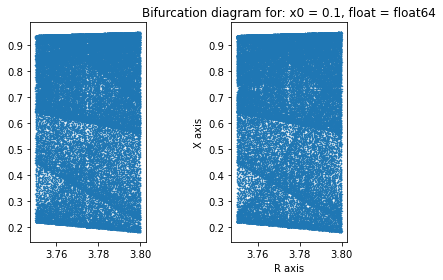

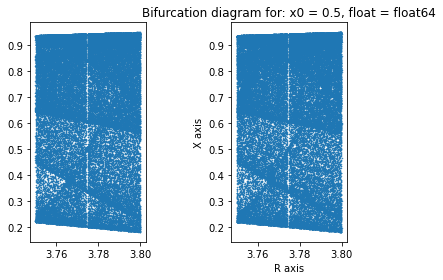

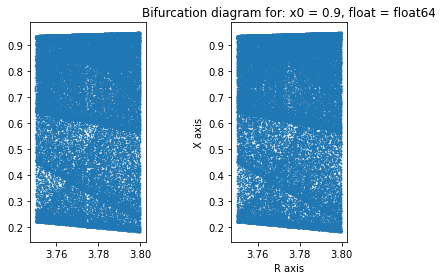

In [163]:
both_floats_bifurcation_diagram(0.1, minimal_r=3.75, maximal_r=3.8)
both_floats_bifurcation_diagram(0.5, minimal_r=3.75, maximal_r=3.8)
both_floats_bifurcation_diagram(0.9, minimal_r=3.75, maximal_r=3.8)